# Adam Ledet
## Using Genre to Predict Price in Games
8 May 2025<br><hr>
**Github Page**: https://github.com/adamledet/itds-project-2025

**Website**: https://adamledet.github.io/itds-project-2025/

I have a passion for interactive media. My undergraduate degree is, in fact, in Game Design and Development. I've frequently been asked by peers who wish to market their games how they should go about pricing them. [Many answers include the game's scope and production quality](https://medium.com/@invogames/understanding-the-cost-of-video-games-what-factors-contribute-to-the-price-d0d6b5350b6), but I'd like to ask if a game's genre affects the listed price.

Are action games generally more expensive than casual games? Are First-Person shooters regularly priced above Sports games? Or are there perhaps a mixture of genres that contribute to a game's historic pricing? If a certain genre of game trends to be more expensive, it may be because a certain genre is more expensive to make or sells particularly well. I predict that certain genres of games correlate with a greater price.

Let's see if there's any validity to my claim.

## Setting up the Data
To get started, we need to access our data from Kaggle.

In [1]:
# Install Kaggle and upload your API key.
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"adamledet","key":"9f5e44bbd95759f9049ca793c04da24f"}'}

In [2]:
# Make a Kaggle directory and give permission to edit it.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                        title                                                 size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance       Student Habits vs Academic Performance               19512  2025-04-12 10:49:08.663000          12478        227  1.0              
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid    Heart Attack Dataset                                 16250  2025-04-30 21:58:22.740000           1311         24  1.0              
rameezmeerasahib/electric-vehicle-ev-sales-and-adoption    Electric Vehicle (EV) Sales and Adoption 🌍🚗⚡         12847  2025-04-12 08:23:08.543000           1713         24  1.0

Next I actually get the dataset I'll be using. The datasets is  https://www.kaggle.com/datasets/joebeachcapital/top-1000-steam-games or "93182 Games from Steam and SteamSpy as of September 15, 2024." The dataset contains detailed information about a huge library of steam games including their Price, Release Date, Reviews, and multiple measurements of playtime! Let's grab the dataset.

In [3]:
# Get two datasets
import kagglehub
! kaggle datasets download 'joebeachcapital/top-1000-steam-games' # 93182 Steam Games
! kaggle datasets download 'trolukovich/steam-games-complete-dataset' # Steam games complete dataset
! mkdir steamNew
! mkdir steamOld
! unzip /content/top-1000-steam-games.zip -d steamNew
! unzip /content/steam-games-complete-dataset.zip -d steamOld

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/top-1000-steam-games
License(s): CC0-1.0
top-1000-steam-games.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset
License(s): CC0-1.0
steam-games-complete-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘steamNew’: File exists
mkdir: cannot create directory ‘steamOld’: File exists
Archive:  /content/top-1000-steam-games.zip
replace steamNew/93182_steam_games.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: steamNew/93182_steam_games.csv  A

  inflating: steamNew/steam_app_data.csv  
  inflating: steamNew/steamspy_data.csv  
Archive:  /content/steam-games-complete-dataset.zip
replace steamOld/steam_games.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: steamOld/steam_games.csv  


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/steamNew/93182_steam_games.csv")
df.head()

<ipython-input-5-e6fbb61ea6d0>:1: DtypeWarning: Columns (3,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/steamNew/93182_steam_games.csv")


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,0,0,3.99,0,'Ashes of war' is an anti war theme adventure ...,['Simplified Chinese'],...,0,0,0,宁夏华夏西部影视城有限公司,宁夏华夏西部影视城有限公司,"Single-player,Family Sharing","Adventure,Casual,Indie,RPG","Sokoban,RPG,Puzzle-Platformer,Exploration,Adve...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0,0,0.00,0,NYCTOPHILIA Nyctophilia is an 2D psychological...,"['English', 'Russian']",...,0,0,0,Cat In A Jar Games,Cat In A Jar Games,Single-player,"Adventure,Free To Play,Indie","Free to Play,Indie,Adventure,Horror,2D,Pixel G...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,0,0,19.99,0,"ABOUT Now nothing more than a phantom, can the...","['English', 'Simplified Chinese', 'Traditional...",...,0,0,0,qureate,qureate,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Sexual Content,Adventure,Indie,Nudity,Anime,Ma...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,0,0,7.99,0,Is a hardcore action with a non-trivial level ...,"['English', 'Russian']",...,0,0,0,Zelenov Artem,Zelenov Artem,"Single-player,Full controller support,Family S...","Action,Indie","Action,Indie,Souls-like,Fantasy,Early Access,R...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,2,0,3.99,0,Panacle: Back to the Wild is a indie card game...,"['English', 'Japanese', 'Simplified Chinese', ...",...,0,0,0,渡鸦游戏,"渡鸦游戏,电钮组","Single-player,Family Sharing","Indie,Strategy,Early Access","Trading Card Game,Turn-Based Strategy,Lore-Ric...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


The dataset has so many features, they can't all fit into the displayed table! There are also so many data points that they also couldn't easily fit in a display.

If you're interested in looking at all the games on Steam, their library is publically viewable [here](https://store.steampowered.com/search/?price=0,5).

## Price Ranges
A Numerical piece of data is a game's price. Let's start there and see how frequently certain prices come up in our dataset.

Text(0, 0.5, 'Price ($)')

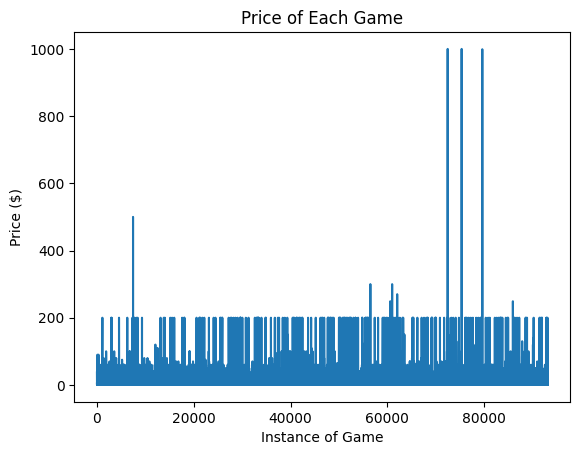

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(len(df)),df["Price"])
plt.title("Price of Each Game")
plt.xlabel("Instance of Game")
plt.ylabel("Price ($)")

There appear to be a few 'ceilings' in pricing. Three games in particular ascend to 1,000 while many games hit the $200 mark precisely. Let's look at the instances of pricing.

Text(0, 0.5, 'Occurrences')

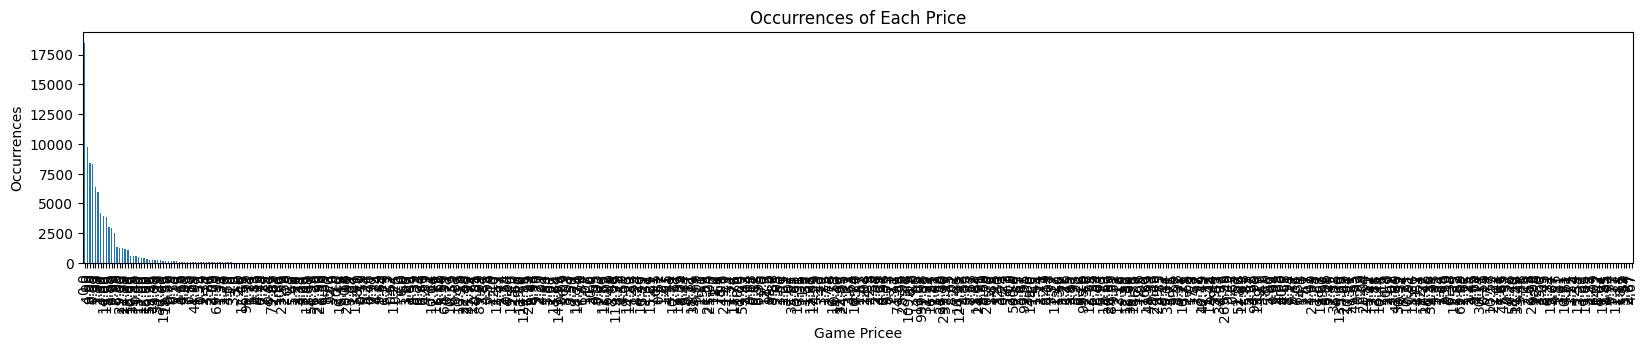

In [7]:
price_counts = df["Price"].value_counts()# Get the number of instances of each price
price_counts.plot(x='Price', y='count', kind='bar', legend=False, figsize=(20,3))# Plot the graph (expanded)
plt.title("Occurrences of Each Price")
plt.xlabel("Game Pricee")
plt.ylabel("Occurrences")

The above graph is unrecognizably disoriented on the x axis. Most of our data has unique prices, which isn't good. Let's trim our data to only instances of prices with at least 10 games associated. Also, we'll sort our x axis so that we can see how our prices are distributed.

Text(0, 0.5, 'Occurrences')

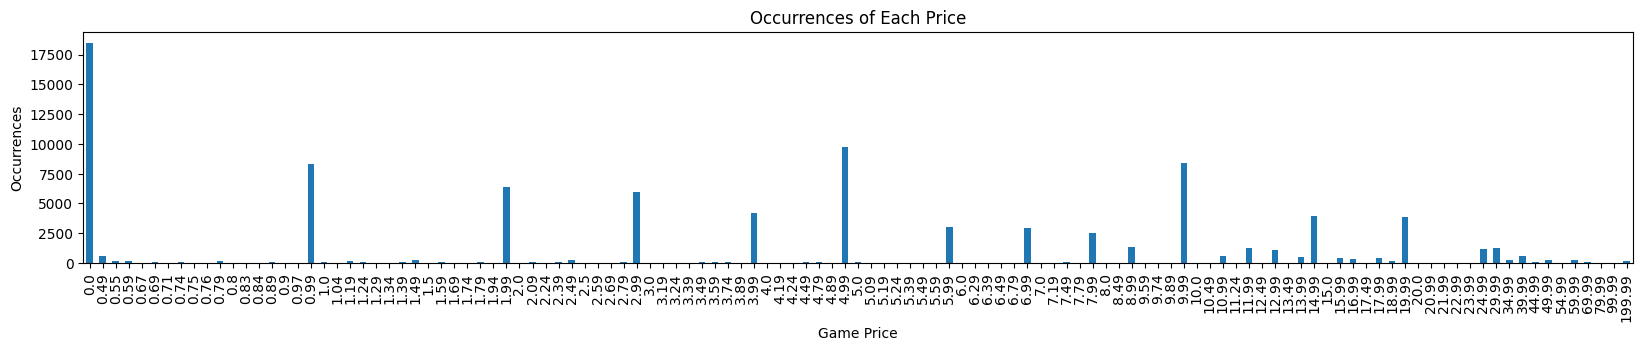

In [8]:
price_counts = df["Price"].value_counts()# Get the number of instances of each price
price_counts = price_counts[price_counts>10]
price_counts = pd.DataFrame(sorted(price_counts.items()), columns=["Price", "count"])
price_counts.plot(x='Price', y='count', kind='bar', legend=False, figsize=(20,3))# Plot the graph (expanded)
plt.title("Occurrences of Each Price")
plt.xlabel("Game Price")
plt.ylabel("Occurrences")

Now we have a decent-looking graph with several 'spikes' representing popular game prices. Free games are most popular with prices at 0.99 and 5.99 also being popular. Now that we know there 'break points,' let's re-integrate the data we cut out y breaking our data into ranges of prices rather than every single price value.

In [9]:
# Our price ranges will be:
# 0
# 0<x<1
# 1<x<2
# 2<x<3
# 3<x<4
# 4<x<5
# 5<x<6
# 6<x<7
# 7<x<8
# 8<x<9
# 9<x<10
# 10<x<15
# 15<x<20
# 20<x<25
# x>25

# Make a df of only our prices
df_prices = df["Price"]

# Make a df for each pricce range
sub0 = df_prices[df_prices == 0]
sub1 = df_prices[(df_prices < 1) & (df_prices > 0)]
sub2 = df_prices[(df_prices < 2) & (df_prices > 1)]
sub3 = df_prices[(df_prices < 3) & (df_prices > 2)]
sub4 = df_prices[(df_prices < 4) & (df_prices > 3)]
sub5 = df_prices[(df_prices < 5) & (df_prices > 4)]
sub6 = df_prices[(df_prices < 6) & (df_prices > 5)]
sub7 = df_prices[(df_prices < 7) & (df_prices > 6)]
sub8 = df_prices[(df_prices < 8) & (df_prices > 7)]
sub9 = df_prices[(df_prices < 9) & (df_prices > 8)]
sub10 = df_prices[(df_prices < 10) & (df_prices > 9)]
sub15 = df_prices[(df_prices < 15) & (df_prices > 10)]
sub20 = df_prices[(df_prices < 20) & (df_prices > 15)]
sub25 = df_prices[(df_prices < 25) & (df_prices > 20)]
post25 = df_prices[df_prices > 25]

In [10]:
price_counts_combined = pd.DataFrame(columns=["Price Range", "Counts"])

# Append all the price ranges to a df
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["Free"], "Counts": [len(sub0)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$1"], "Counts": [len(sub1)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$2"], "Counts": [len(sub2)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$3"], "Counts": [len(sub3)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$4"], "Counts": [len(sub4)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$5"], "Counts": [len(sub5)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$6"], "Counts": [len(sub6)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$7"], "Counts": [len(sub7)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$8"], "Counts": [len(sub8)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$9"], "Counts": [len(sub9)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$10"], "Counts": [len(sub10)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$15"], "Counts": [len(sub15)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$20"], "Counts": [len(sub20)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["<$25"], "Counts": [len(sub25)]})], ignore_index=True)
price_counts_combined = pd.concat([price_counts_combined,pd.DataFrame({"Price Range": ["$25+"], "Counts": [len(post25)]})], ignore_index=True)
price_counts_combined

,Price Range,Counts
0,Free,18473
1,<$1,9863
2,<$2,7257
3,<$3,6457
4,<$4,4596
5,<$5,10061
6,<$6,3177
7,<$7,3048
8,<$8,2707
9,<$9,1445


Text(0, 0.5, 'Occurrences')

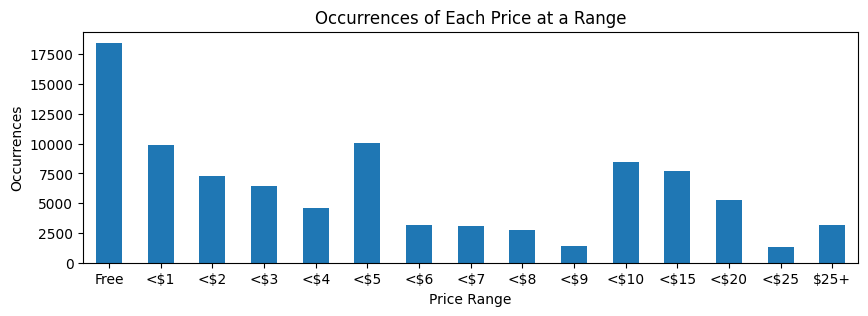

In [11]:
price_counts_combined.plot(x='Price Range', y='Counts', kind='bar', legend=False, figsize=(10,3))# Plot the graph (expanded)
plt.xticks(rotation=0)# Make the x-axis text appear laterally
plt.title("Occurrences of Each Price at a Range")
plt.xlabel("Price Range")
plt.ylabel("Occurrences")

With the above, we can see right-skewed data that 'resets' at rough intervals such as at 5 and 10 dollars. Free games are the most popular choice of published game in our dataset.

## Genres
Now that we have an understanding of our range of prices, lets look at our different genres. These will act as the features for our data.

In [12]:
# Show example of Genres, Categories, and Tags in dataset
print("Categories: ",df["Categories"].unique())

Categories:  ['Single-player,Family Sharing' 'Single-player'
 'Single-player,Steam Achievements,Full controller support,Family Sharing'
 ...
 'Single-player,Multi-player,PvP,Shared/Split Screen PvP,Co-op,Shared/Split Screen Co-op,Shared/Split Screen,Steam Achievements,Full controller support,Tracked Controller Support,VR Supported,Steam Trading Cards,VR Support,Remote Play Together,Family Sharing'
 'Single-player,Multi-player,PvP,Shared/Split Screen PvP,Shared/Split Screen,Steam Achievements,Stats,Remote Play Together'
 'Single-player,Multi-player,PvP,Online PvP,Co-op,Online Co-op,Steam Achievements,Steam Workshop,Steam Cloud,Stats,Includes level editor,Family Sharing']


Before we can do anything with our labels, we need to properly clean and separate this data. Games can be a part of multiple Categories, but currently each unique combination of Categories is its own unique label. The same is true for Genres and Tags. Before we do anything, we need to separate out each label and make sure that two games that share a label are represented as such. Below is an example of a game with multiple tags.

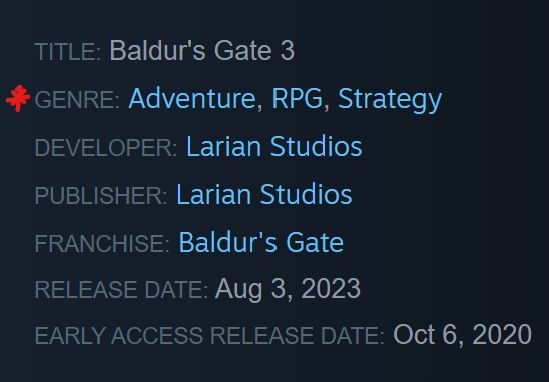

In [13]:
# Get 1-hot encoding for each Genre, Category, and Tag
genres = df["Genres"].str.get_dummies(sep=',')# Removed name category because it threw errors when trying to get integers
genres=genres.astype(int)

genres# Display genres in table

,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,...,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93177,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93178,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93179,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
93180,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The above is 1-hot encoded data about our Genres. Each possible genre is a column with a 0 representing that the indexed game does not have the Genre and 1 representing that the game does. Let's look at a distribution of our different Categories, Genres, and Tags.

In [14]:
# Count the total of each column for each df
genre_counts = genres.sum()

Indie                    61959
Casual                   37819
Action                   36689
Adventure                34866
Simulation               17962
Strategy                 17218
RPG                      16058
Early Access              9084
Free To Play              8061
Sports                    3928
Racing                    3240
Massively Multiplayer     2152
Utilities                  855
Design & Illustration      504
Violent                    436
Education                  401
Animation & Modeling       400
Video Production           295
Gore                       268
Game Development           258
Audio Production           199
Software Training          196
Photo Editing              146
Web Publishing             102
Nudity                      99
Sexual Content              93
Accounting                  23
Movie                        2
360 Video                    1
Episodic                     1
Documentary                  1
Short                        1
Tutorial

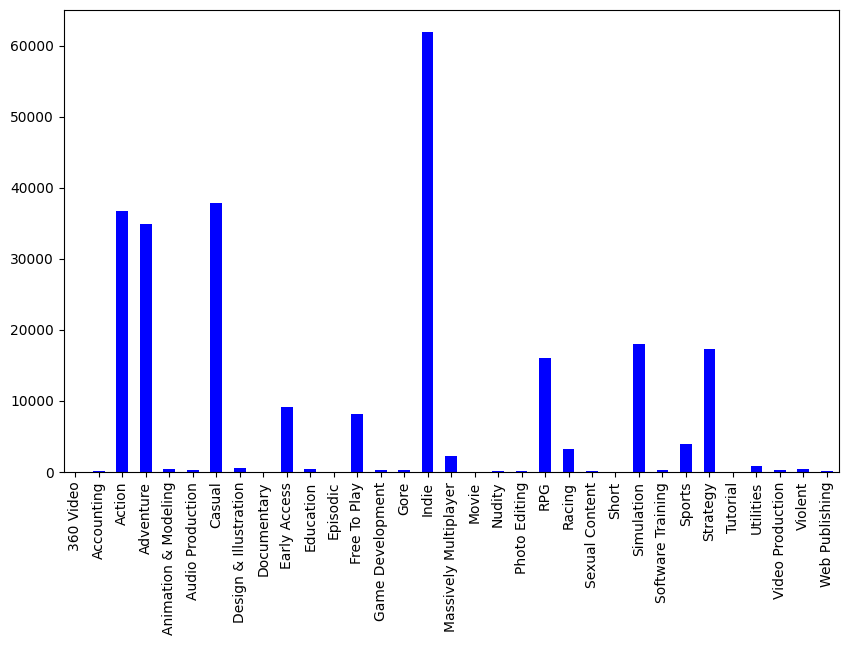

In [15]:
genre_counts.plot(kind='bar', figsize=(10,6), color="blue")
print(genre_counts.sort_values(ascending=False))# Display the counts of each genre

Now that we have our labels and features, the price and genres respectively, let's see about drawing some correlations between the two to see how likely we'll be able to make predictions.

## Getting Correlations Between Data

In [16]:
import seaborn as sns

In [17]:
genres_trim = genres.copy()
genres_trim = genres_trim.drop(columns=["360 Video", "Documentary", "Episodic", "Movie", "Short", "Tutorial"])# Drop genres that were special outliers
genres_trim_counts = genres_trim.sum()
genres_trim_counts

,0
Accounting,23
Action,36689
Adventure,34866
Animation & Modeling,400
Audio Production,199
Casual,37819
Design & Illustration,504
Early Access,9084
Education,401
Free To Play,8061


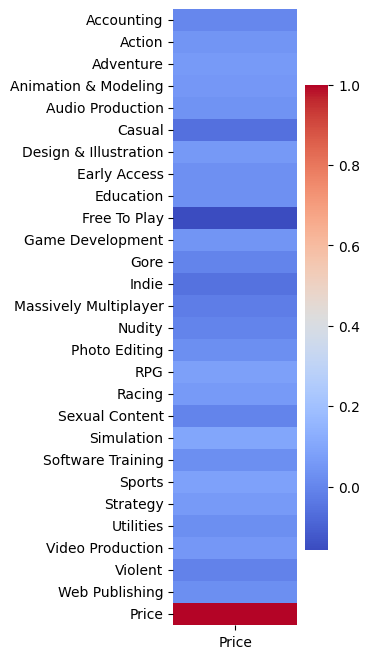

In [18]:
# Genres
genres_trim = genres_trim.join(df["Price"])
genres_corr = genres_trim.corr()

plt.subplots(figsize=(2,8))
sns.heatmap(genres_corr[["Price"]], cmap='coolwarm')
plt.show()

In [19]:
genres_corr[["Price"]]# Show actual correlation values. 0.2 is considered 'weak correlation'; the greatest correlation is 'free-to-play'which only has a -0.16 correlation

,Price
Accounting,0.004792
Action,0.043704
Adventure,0.062442
Animation & Modeling,0.053859
Audio Production,0.040315
Casual,-0.058103
Design & Illustration,0.055885
Early Access,0.029713
Education,0.030132
Free To Play,-0.157276


Oof. That's not a good sign. The correlations in our data are so miniscule, they may as well not exist..! This means that building a model with genre as our primary feature won't get good results.
Let's try anyway and see how well our model does..!

## Modeling the Data
A KNN model takes the labels of similarly-features data and uses them to predict unseen data. My hope is that we can look at games with similar genres and use them to predict a game's price. Because, however, our correlations between price and genre are so poor, I'm not expecting stellar results; but perhaps there is something invisible to the human eye that the model will be able to see..!

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

trainData, testData, trainLabel, testLabel = train_test_split(genres, df["Price"], test_size=0.2)

Through testing, I determined that a higher K yields better results in this situation capping out at ~20. Just to go a little over, let's set our K to 25.
Our error metric will be Root Mean Squared Error (RMSE). Because our label is a tangible price, our RMSE can actually predict how far away we are from predicting an average game's price.

In [21]:
k=25# Through testing, a K of 25 proved to be a good result (or really anything above ~20)
rmse_list_train = []
rmse_list_test = []

# Train Model at given k
model = KNeighborsRegressor(n_neighbors=k)
model.fit(trainData,trainLabel)

# Get training data prediction
trainPredLabels = model.predict(trainData)
rmse = root_mean_squared_error(np.array(trainLabel), trainPredLabels)
rmse_list_train.append(rmse)

# Get test data prediction
testPredLabels = model.predict(testData)
rmse = root_mean_squared_error(np.array(testLabel), testPredLabels)
rmse_list_test.append(rmse)

It takes a VERY long time for our model to run. In previous testing, I liked to prove that my value of k was optimal by running every K from 1 to 50, but that took up to several hours to complete. Instead, I set a historically good K value from prior knowledge.

Now let's plot our data with the X-axis represent the actual price and the Y-axis representing our prediction. If everything went well, we should have more predictions along the slope of the y=x line.

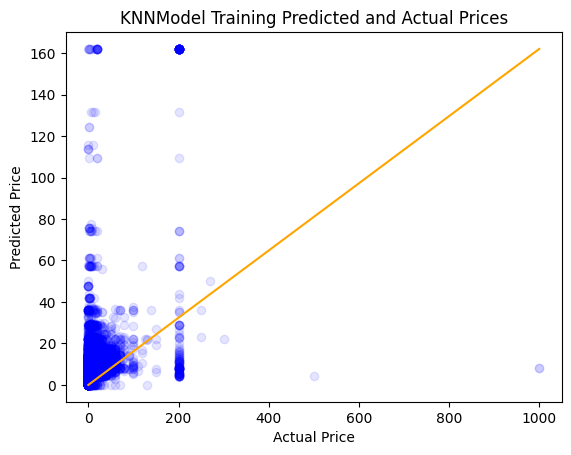

Training RMSE: 12.881307262839027


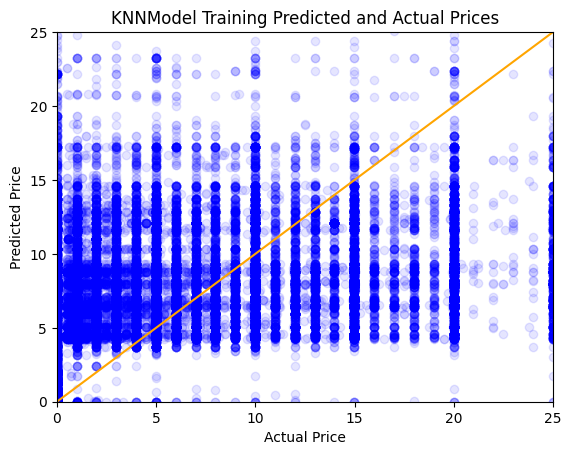

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(trainLabel,trainPredLabels, color="blue", label="Training", alpha=0.1)
plt.plot([0,trainLabel.max()],[0,trainPredLabels.max()], color="orange")# Test line to show what the 'correct prediction' should be
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNNModel Training Predicted and Actual Prices")
#plt.xlim(0, 25)
#plt.ylim(0, 25)
plt.show()

print("Training RMSE:",rmse_list_train[0])

cutoffPoint = 25
plt.scatter(trainLabel,trainPredLabels, color="blue", label="Training", alpha=0.1)
plt.plot([0,cutoffPoint],[0,cutoffPoint], color="orange")# Test line to show what the 'correct prediction' should be
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNNModel Training Predicted and Actual Prices")
plt.xlim(0, cutoffPoint)
plt.ylim(0, cutoffPoint)
plt.show()

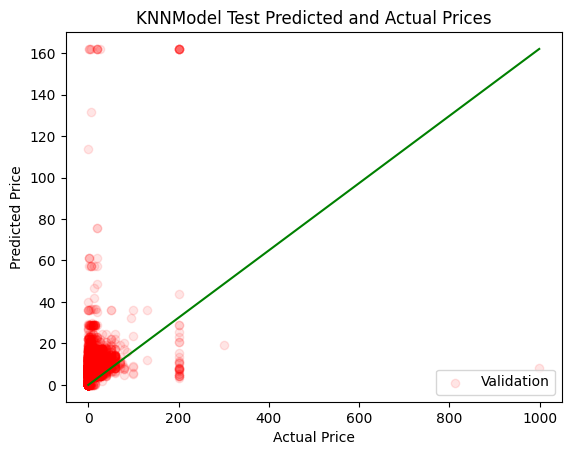

Test RMSE: 13.838513831422796


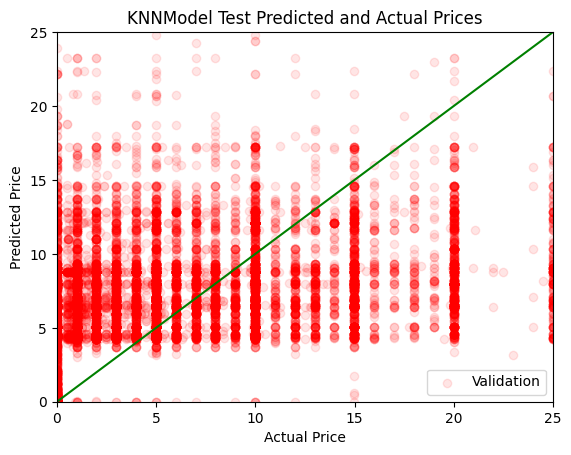

In [23]:
plt.scatter(testLabel,testPredLabels, color="red", label="Validation", alpha=0.1)
plt.plot([0,testLabel.max()],[0,testPredLabels.max()], color="green")# Test line to show what the 'correct prediction' should be
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNNModel Test Predicted and Actual Prices")
#plt.xlim(0, 25)
#plt.ylim(0, 25)
plt.legend()
plt.show()

print("Test RMSE:",rmse_list_test[0])

cutoffPoint = 25
plt.scatter(testLabel,testPredLabels, color="red", label="Validation", alpha=0.1)
plt.plot([0,cutoffPoint],[0,cutoffPoint], color="green")# Test line to show what the 'correct prediction' should be
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNNModel Test Predicted and Actual Prices")
plt.xlim(0, cutoffPoint)
plt.ylim(0, cutoffPoint)
plt.legend()
plt.show()

These are NOT good training results. Our data looks like random guesses, and we're incredibly far from the target line. Our RMSE is 12.7 for training and 14.7 for validation data which means we're between 13 and 15 dollars away from the actual price every prediction.
Additionally, our graphs are so skewed that it's difficult to tell what's happening in our data. The second graph in each block is a 'zoomed in' look at the data below 25 dollars.

In [24]:
import random
# Get sample of predicted and actual labels
tLabels = np.array(testLabel)
for i in range(10):
  r = random.randint(0, len(tLabels) - 1)
  print("Predicted Label:",testPredLabels[r])
  print("Actual Label:",tLabels[r])
  print("")

Predicted Label: 5.935599999999999
Actual Label: 1.99

Predicted Label: 9.776800000000001
Actual Label: 19.99

Predicted Label: 0.0
Actual Label: 0.0

Predicted Label: 6.3908000000000005
Actual Label: 24.99

Predicted Label: 0.0
Actual Label: 0.0

Predicted Label: 8.7624
Actual Label: 1.99

Predicted Label: 4.3608
Actual Label: 14.99

Predicted Label: 7.983600000000001
Actual Label: 6.99

Predicted Label: 4.3228
Actual Label: 4.99

Predicted Label: 4.5123999999999995
Actual Label: 6.99



Looking at some examples of our predictions, we actually get pretty close to our target value with surprising frequency, but we're occasionally knocked down with a wildly inaccurate prediction. Running the above cell repeately will give 10 random predictions and their actual label from the model.
Are our outlier labels influencing too much of our model? Let's next try to cut back our outlier data.

## Improving Our Model
If we just look at the features and prices of our original dataset, we get horrific results. However, we know that there are many more Free-To-Play games than any other price, and there are a handfull of ridiculously priced outliers. Perhaps removing them will improve our correlations and our model accuracy.
Let's start by making a dataset that only contains games that cost less than $25 that aren't free-to-play.

In [25]:
# Removing 'free-to-play' games from the listing as well as games above $25
df_edited = df[((df["Price"] > 0) & (df["Price"] < 25))].copy()
df_edited

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,0,0,3.99,0,'Ashes of war' is an anti war theme adventure ...,['Simplified Chinese'],...,0,0,0,宁夏华夏西部影视城有限公司,宁夏华夏西部影视城有限公司,"Single-player,Family Sharing","Adventure,Casual,Indie,RPG","Sokoban,RPG,Puzzle-Platformer,Exploration,Adve...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,0,0,19.99,0,"ABOUT Now nothing more than a phantom, can the...","['English', 'Simplified Chinese', 'Traditional...",...,0,0,0,qureate,qureate,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Sexual Content,Adventure,Indie,Nudity,Anime,Ma...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,0,0,7.99,0,Is a hardcore action with a non-trivial level ...,"['English', 'Russian']",...,0,0,0,Zelenov Artem,Zelenov Artem,"Single-player,Full controller support,Family S...","Action,Indie","Action,Indie,Souls-like,Fantasy,Early Access,R...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,2,0,3.99,0,Panacle: Back to the Wild is a indie card game...,"['English', 'Japanese', 'Simplified Chinese', ...",...,0,0,0,渡鸦游戏,"渡鸦游戏,电钮组","Single-player,Family Sharing","Indie,Strategy,Early Access","Trading Card Game,Turn-Based Strategy,Lore-Ric...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
6,1054250,krAsAvA Shot,"Apr 4, 2019",0 - 20000,0,0,0.99,0,2079 planet Earth. Together with the spacecraf...,"['English', 'Russian']",...,0,0,0,MIGALOO GAMES,MIGALOO GAMES,"Single-player,Multi-player,Co-op,Online Co-op,...","Adventure,Indie","Indie,Gore,Adventure",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93177,2251030,Mutant Monty (C64/CPC/Spectrum),"Jan 5, 2023",NaN,0,0,4.99,0,Originally released in 1984 for home microcomp...,['English'],...,0,0,0,Artic Computing,Pixel Games UK,"Single-player,Partial Controller Support,Steam...",Action,NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
93178,1330890,Crystal Caves HD,"Oct 15, 2020",NaN,0,0,7.99,0,The best miner in the Galaxy is back! Revisit ...,['English'],...,0,0,0,Emberheart Games,Apogee Entertainment,"Single-player,Steam Achievements,Full controll...",Action,NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
93179,1844230,Malicious ReloadⅡ,"Sep 5, 2023",NaN,0,0,5.99,0,★ To ensure that the game you have purchased w...,"['Japanese', 'English', 'Simplified Chinese', ...",...,0,0,0,UNDER HILL,Playmeow,"Single-player,Family Sharing","Action,Adventure,Simulation",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
93180,2623690,Mutant Frog,"Jan 27, 2024",NaN,0,0,0.99,0,As a result of an unknown meteorite hitting an...,['English'],...,0,0,0,Run-O Games,Run-O Games,"Single-player,Family Sharing","Action,Adventure,Casual,Indie",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


In [26]:
genres_edited = df_edited["Genres"].str.get_dummies(sep=',')
genres_edited=genres_edited.astype(int)
trainData, testData, trainLabel, testLabel = train_test_split(genres_edited, df_edited["Price"], test_size=0.2)

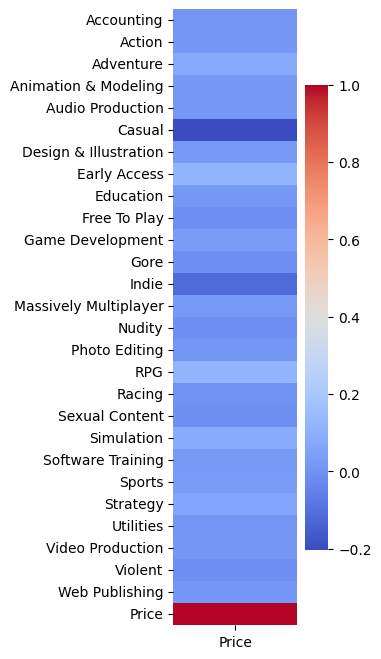

In [27]:
# Genres
genres_edited_trim = genres_edited.copy()
genres_edited_trim = genres_edited_trim.drop(columns=["360 Video", "Documentary", "Episodic", "Movie", "Short", "Tutorial"])# Drop genres that were special outliers
genres_edited_trim = genres_edited_trim.join(df_edited["Price"])
genres_edited_corr = genres_edited_trim.corr()

plt.subplots(figsize=(2,8))
sns.heatmap(genres_edited_corr[["Price"]], cmap='coolwarm')
plt.show()

In [28]:
genres_edited_corr[["Price"]]# Show actual correlation values. 0.2 is considered 'weak correlation'; the greatest correlation is 'free-to-play'which only has a -0.16 correlation

,Price
Accounting,0.009362
Action,0.015678
Adventure,0.075230
Animation & Modeling,0.021102
Audio Production,0.017867
Casual,-0.203076
Design & Illustration,0.024510
Early Access,0.119301
Education,0.020632
Free To Play,-0.007031


This secondary hypothesis doesn't look good. Our correlation matrix is just as bad as before. All that's left is to see if our model can do anything unexpected.

In [29]:
# Repeat our KNN Model
k=25
rmse_list_train = []
rmse_list_test = []

# Train Model at given k
model = KNeighborsRegressor(n_neighbors=k)
model.fit(trainData,trainLabel)

# Get training data prediction
trainPredLabels = model.predict(trainData)
rmse = root_mean_squared_error(np.array(trainLabel), trainPredLabels)
rmse_list_train.append(rmse)

# Get test data prediction
testPredLabels = model.predict(testData)
rmse = root_mean_squared_error(np.array(testLabel), testPredLabels)
rmse_list_test.append(rmse)

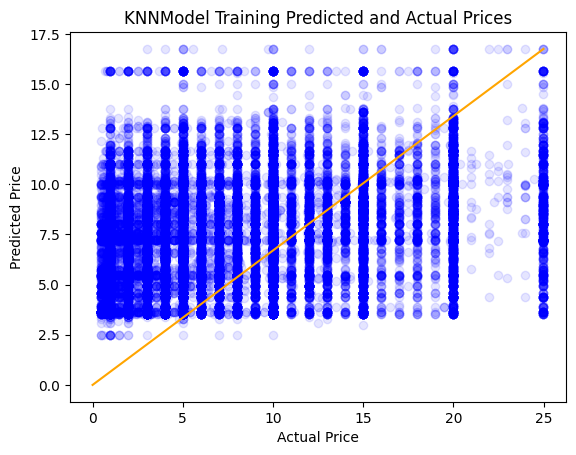

Training RMSE: 5.53254520296373


In [30]:
plt.scatter(trainLabel,trainPredLabels, color="blue", label="Training", alpha=0.1)
plt.plot([0,trainLabel.max()],[0,trainPredLabels.max()], color="orange")# Test line to show what the 'correct prediction' should be
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNNModel Training Predicted and Actual Prices")
#plt.xlim(0, 25)
#plt.ylim(0, 25)
plt.show()

print("Training RMSE:",rmse_list_train[0])

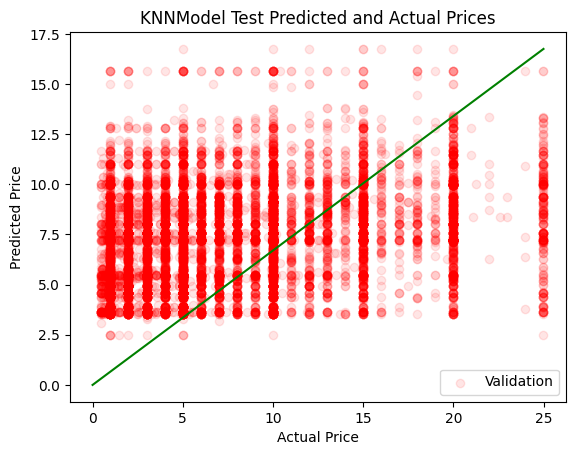

Test RMSE: 5.601155387359211


In [31]:
plt.scatter(testLabel,testPredLabels, color="red", label="Validation", alpha=0.1)
plt.plot([0,testLabel.max()],[0,testPredLabels.max()], color="green")# Test line to show what the 'correct prediction' should be
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNNModel Test Predicted and Actual Prices")
#plt.xlim(0, 25)
#plt.ylim(0, 25)
plt.legend()
plt.show()

print("Test RMSE:",rmse_list_test[0])

While our RMSE has indeed decreased, our data looks no better. Rather than a clean line following the actual and predicted prices, we have scattered guesses abound. It's safe to say that, with this dataset at least, we cannot use Genre as an indication to predict a game's price.

## Conclusions
The ultimate goal of this project was to determine if we could look at a game's genre and determine the game's price to see if certain genres tend to be more or less expensive than others. The objective of this was to help peers price their games based on the type of game they've created and perhaps see if genre might correlate with unseen factors to influence a game's price.
Sadly, our results indicate that the genre of game has little to no impact on the game's price. Other factors such as the quality of the game, it's length in playtime, or developer popularity may contribute instead; but such investigations go outside the scope of this project. In truth, I attempted to use Category and Tag as additional factors but found that they proved just as inefficient in predicting a game's price!

A possible conclusion to draw from this is that the industry seeks to saturate each genre at variable price points so that consumers with certain interests are not priced out of their hobby. Strategy game developers make games at every price to leave no section of the market unsaturated! Perhaps also my dataset was improper. While it contained over 90,000 games, they all came from the same source, Steam. For further reading on factors that can influence a game's price, look to this [article from Xsolla](https://xsolla.com/blog/how-to-set-the-right-price-for-your-game), a company that specializes in gaming transactions.

For now, at least, I can state with relative certainty that using a KNN model is insufficient to predict a game's price using the listed dataset.
--Adam Ledet